In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "GE"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [3]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-08,11.768156,11.923933,11.768156,11.831883,49730800
2010-11-09,11.909769,11.909769,11.711509,11.768155,51924800
2010-11-10,11.782316,11.803559,11.591137,11.718590,51685600
2010-11-11,11.640704,11.697349,11.484928,11.576978,48482300
2010-11-12,11.506169,11.605299,11.407040,11.506169,50251700


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-11-08 to 2020-11-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


<AxesSubplot:xlabel='Date'>

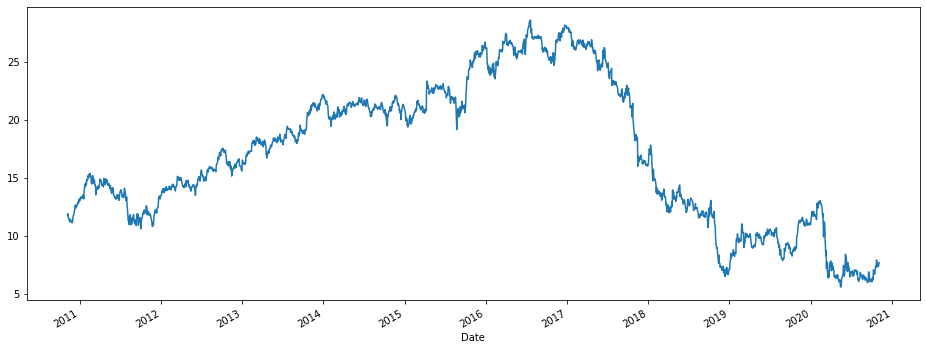

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1952, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1952/1952 [==============================] - 10s 5ms/step - loss: 0.0283
Epoch 2/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0051
Epoch 3/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0052
Epoch 4/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0053
Epoch 5/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0042
Epoch 6/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0044
Epoch 7/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0045
Epoch 8/100
1952/1952 [==============================] - 8s 4ms/step - loss: 0.0039
Epoch 9/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0034
Epoch 10/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0038
Epoch 11/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0033
Epoch 12/100
1952/1952 [==============================] - 7s 4ms/step - l

Epoch 97/100
1952/1952 [==============================] - 7s 4ms/step - loss: 8.8179e-04
Epoch 98/100
1952/1952 [==============================] - 7s 4ms/step - loss: 9.3442e-04
Epoch 99/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0010
Epoch 100/100
1952/1952 [==============================] - 6s 3ms/step - loss: 9.7026e-04s -


# Testing

In [16]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
X_test

array([[[-0.01127948],
        [-0.01275077],
        [-0.00833704],
        ...,
        [-0.03075645],
        [ 0.01639064],
        [ 0.0291596 ]],

       [[-0.01275077],
        [-0.00833704],
        [-0.02353985],
        ...,
        [ 0.01639064],
        [ 0.0291596 ],
        [ 0.03259743]],

       [[-0.00833704],
        [-0.02353985],
        [-0.04070427],
        ...,
        [ 0.0291596 ],
        [ 0.03259743],
        [ 0.0316151 ]],

       ...,

       [[-0.14841543],
        [-0.14121818],
        [-0.11859825],
        ...,
        [-0.08505837],
        [-0.07733431],
        [-0.09381234]],

       [[-0.14121818],
        [-0.11859825],
        [-0.11859824],
        ...,
        [-0.07733431],
        [-0.09381234],
        [-0.08557333]],

       [[-0.11859825],
        [-0.11859824],
        [-0.13299274],
        ...,
        [-0.09381234],
        [-0.08557333],
        [-0.07784923]]])

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
X_test

array([[[-0.01127948],
        [-0.01275077],
        [-0.00833704],
        ...,
        [-0.03075645],
        [ 0.01639064],
        [ 0.0291596 ]],

       [[-0.01275077],
        [-0.00833704],
        [-0.02353985],
        ...,
        [ 0.01639064],
        [ 0.0291596 ],
        [ 0.03259743]],

       [[-0.00833704],
        [-0.02353985],
        [-0.04070427],
        ...,
        [ 0.0291596 ],
        [ 0.03259743],
        [ 0.0316151 ]],

       ...,

       [[-0.14841543],
        [-0.14121818],
        [-0.11859825],
        ...,
        [-0.08505837],
        [-0.07733431],
        [-0.09381234]],

       [[-0.14121818],
        [-0.11859825],
        [-0.11859824],
        ...,
        [-0.07733431],
        [-0.09381234],
        [-0.08557333]],

       [[-0.11859825],
        [-0.11859824],
        [-0.13299274],
        ...,
        [-0.09381234],
        [-0.08557333],
        [-0.07784923]]])

In [20]:
predicted_stock_price = regressor.predict(X_test)

In [21]:
predicted_stock_price

array([[-2.03332603e-02],
       [-5.13955951e-03],
       [-1.21164322e-03],
       [ 4.77239490e-03],
       [ 5.87666035e-03],
       [-2.93868780e-03],
       [-1.39319301e-02],
       [-1.56321526e-02],
       [-1.30082071e-02],
       [-4.02873755e-03],
       [ 4.06593084e-04],
       [-1.74602866e-03],
       [-4.80756164e-03],
       [-7.68932700e-03],
       [-8.78778100e-03],
       [ 2.12555230e-02],
       [ 4.53408659e-02],
       [ 5.42363226e-02],
       [ 5.24335802e-02],
       [ 4.05826271e-02],
       [ 2.82696784e-02],
       [ 2.42000818e-02],
       [ 4.56485152e-03],
       [-1.78239346e-02],
       [-2.51046121e-02],
       [-1.94557011e-02],
       [-2.38540769e-03],
       [ 6.63957000e-03],
       [ 1.74271762e-02],
       [ 2.39328444e-02],
       [ 1.89817250e-02],
       [ 1.58010423e-02],
       [ 1.44750774e-02],
       [ 1.64296329e-02],
       [ 1.98944509e-02],
       [ 1.74650848e-02],
       [ 1.32249892e-02],
       [ 1.32493079e-02],
       [ 1.3

In [22]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [23]:
y_test

array([[ 0.03259743],
       [ 0.0316151 ],
       [ 0.05224189],
       [ 0.03996413],
       [ 0.01982847],
       [ 0.0129529 ],
       [ 0.02277513],
       [ 0.01835513],
       [ 0.03357965],
       [ 0.02523065],
       [ 0.02081069],
       [ 0.02375732],
       [ 0.02081072],
       [ 0.02179284],
       [ 0.09644231],
       [ 0.07933182],
       [ 0.08137493],
       [ 0.08086409],
       [ 0.06196598],
       [ 0.05532616],
       [ 0.05839077],
       [ 0.00118564],
       [-0.00800806],
       [ 0.00526576],
       [ 0.01140145],
       [ 0.0359439 ],
       [ 0.02571781],
       [ 0.05486191],
       [ 0.05435064],
       [ 0.03901157],
       [ 0.0507716 ],
       [ 0.0461699 ],
       [ 0.04974897],
       [ 0.05077156],
       [ 0.03747769],
       [ 0.03696643],
       [ 0.04361333],
       [ 0.03747769],
       [ 0.03850031],
       [ 0.04054556],
       [ 0.04259082],
       [ 0.05281676],
       [ 0.04463593],
       [ 0.04310199],
       [ 0.01446925],
       [ 0

In [24]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [25]:
predicted_stock_price

array([[ 8.766948 ],
       [ 9.062006 ],
       [ 9.138285 ],
       [ 9.254494 ],
       [ 9.275938 ],
       [ 9.104746 ],
       [ 8.89126  ],
       [ 8.858242 ],
       [ 8.909199 ],
       [ 9.083578 ],
       [ 9.169711 ],
       [ 9.127908 ],
       [ 9.068453 ],
       [ 9.01249  ],
       [ 8.9911585],
       [ 9.574593 ],
       [10.042324 ],
       [10.215072 ],
       [10.180062 ],
       [ 9.94992  ],
       [ 9.710805 ],
       [ 9.631775 ],
       [ 9.2504635],
       [ 8.815679 ],
       [ 8.674289 ],
       [ 8.78399  ],
       [ 9.115491 ],
       [ 9.290754 ],
       [ 9.500247 ],
       [ 9.626585 ],
       [ 9.530436 ],
       [ 9.468668 ],
       [ 9.442918 ],
       [ 9.480875 ],
       [ 9.548161 ],
       [ 9.500983 ],
       [ 9.418641 ],
       [ 9.419113 ],
       [ 9.41628  ],
       [ 9.4132395],
       [ 9.425708 ],
       [ 9.452871 ],
       [ 9.548981 ],
       [ 9.569178 ],
       [ 9.525359 ],
       [ 9.261663 ],
       [ 8.953227 ],
       [ 8.74

In [26]:
actual_stock_price.shape

(444, 1)

In [27]:
predicted_stock_price.shape

(444, 1)

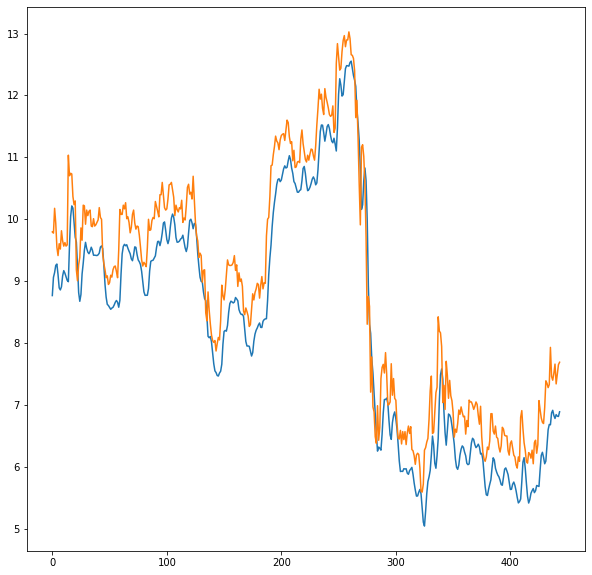

In [28]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [29]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [30]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


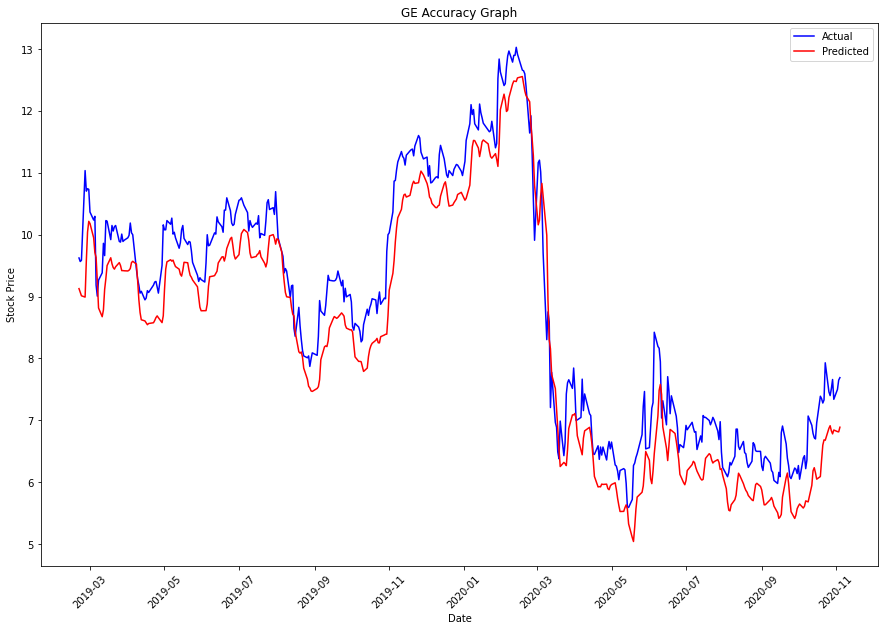

In [31]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'],fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

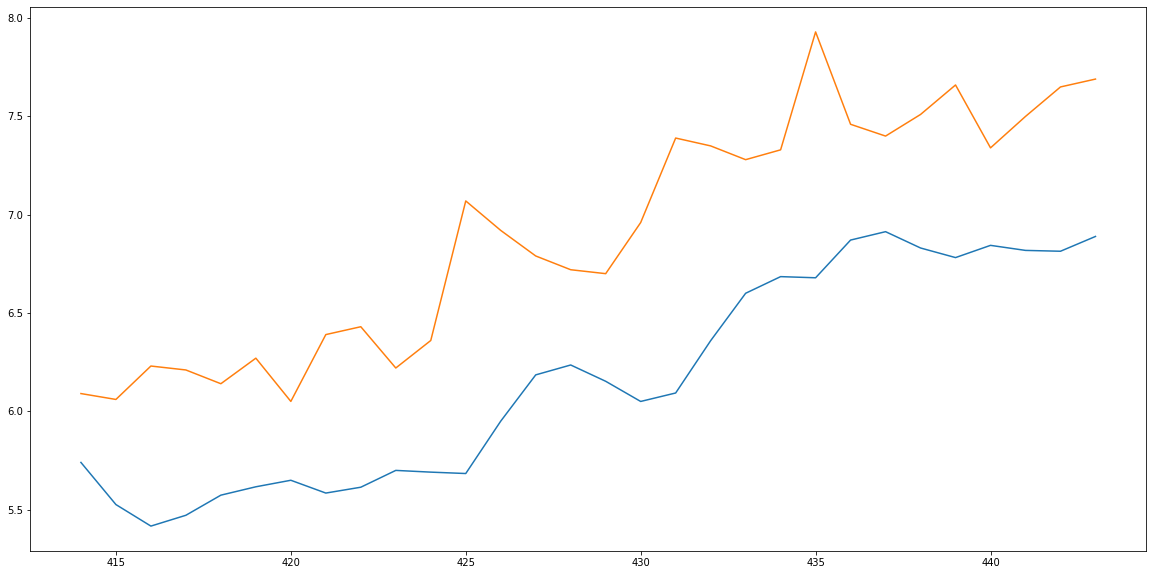

In [32]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [33]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)